In [1]:
#Important imports
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis

#Setting the compile process on the GPU if existing 
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class DataSet(Dataset):
    
    def __init__(self, path):
        #"Transfering the values from the file to a tensor matrix"
        self.dataset = torch.tensor(pd.read_csv(path).values)
        
    def __len__(self):
        #"Creating a function that returns the length of the dataset"
        return len(self.dataset)
    
    def __getitem__(self, i):
        #"Creating a function that separates the data from the target"
        return self.dataset[i, :-1], self.dataset[i, -1]

In [3]:
class Net(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()        
        #Defining the number of features
        self.n_features = n_features
        #Creating all the neural network fully connected layers
        self.fc1 = nn.Linear(self.n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        #Transfering the output from every layer with the activation function to the next layer
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        return out

In [5]:
def training_loop(n_epoch, optimizer, model, loss_fn, train_loader, test_loader, print_plot):
    #Creating the training function
    
    #Creating two tensors to determine the accuracy of the model 
    train_accuracy = torch.zeros(n_epoch)
    test_accuracy = torch.zeros(n_epoch)
    
    for epoch in range(n_epoch):
        #Iterating through all the epochs
        for example, label in train_loader:
            #Iterating through every bach
            
            #Setting the processing to take place on the GPU if existing
            example = example.to(DEVICE)
            label = label.to(DEVICE)
            #Reforming the output 
            label = label.unsqueeze(1)
            #Setting the model to run on the examples
            output = model(example.float())
            #Determining the difference between the target values and the output
            loss = loss_fn(output, label.float())
            #Reforming the wait connections, and optimizing them
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        with torch.no_grad():
            #Testing the model 
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                #Iterating through the train and test data
                correct = 0
                total = 0

                for examples, labels in loader:
                    #Setting the processing to take place on the GPU if existing
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)
                    #Sending the examples to the model
                    outputs = model(examples.float())
                    #Reforming the output to just two values
                    predicted = torch.round(outputs)
                    #Counting the number of labels
                    total += labels.shape[0]
                    #Counting the number of correct predictions made
                    correct += (predicted == labels).sum()
                #Determining the the accuracy of the epoch
                accuracy[epoch] = correct / total
        #Printing the test and train accuracy in every tenth epoch
        if (epoch+1) % 10 ==0:
            print(f'Epoch {epoch+1})', 
                  f'Train Accuracy: {train_accuracy[epoch]}',
                  f'Test Accuracy: {test_accuracy[epoch]}') 
            
    #Printing the results in plot graph 
    if print_plot:
        epochs = range(n_epoch)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show() 

In [12]:
#Reading the data from the csv file
data = DataSet(r'F:\Eduard\Autodezvoltare\CV camp\CVC3\diabetes.csv')

#Determining the number of test and train data
n_sample = len(data)
n_test = int(0.2*n_sample)

#Spliting the data randomly in two pieces
train_set, test_set = torch.utils.data.random_split(data, [n_sample-n_test, n_test])

#Separating the train and test data, and shuffleing it for a better result
train_loader = torch.utils.data.DataLoader(train_set, batch_size = len(train_set), shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = len(test_set), shuffle = True)


C:\Users\balam\anaconda3\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.43414634466171265 Test Accuracy: 0.4313725531101227
Epoch 20) Train Accuracy: 0.6471544504165649 Test Accuracy: 0.5947712659835815
Epoch 30) Train Accuracy: 0.6845528483390808 Test Accuracy: 0.6405228972434998
Epoch 40) Train Accuracy: 0.7089430689811707 Test Accuracy: 0.6928104758262634
Epoch 50) Train Accuracy: 0.7089430689811707 Test Accuracy: 0.7254902124404907
Epoch 60) Train Accuracy: 0.7138211131095886 Test Accuracy: 0.7385621070861816
Epoch 70) Train Accuracy: 0.7219512462615967 Test Accuracy: 0.7254902124404907
Epoch 80) Train Accuracy: 0.725203275680542 Test Accuracy: 0.7385621070861816
Epoch 90) Train Accuracy: 0.7268292903900146 Test Accuracy: 0.7385621070861816
Epoch 100) Train Accuracy: 0.7317073345184326 Test Accuracy: 0.7385621070861816
Epoch 110) Train Accuracy: 0.7430894374847412 Test Accuracy: 0.7385621070861816
Epoch 120) Train Accuracy: 0.7447154521942139 Test Accuracy: 0.7385621070861816
Epoch 130) Train Accuracy: 0.7577235698699951 Tes

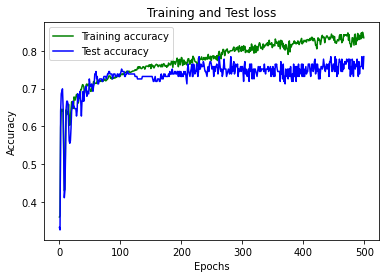

In [13]:
#Setting the learining rate
learning_rate = 0.01

#Setting the model for trainging on the GPU if existing
model = Net(len(data[0][0])).to(DEVICE)

#Setting the Adam optimizator
optimizizer = optim.Adam(model.parameters(), lr = learning_rate)

#Setting the loss function
loss_fn = nn.BCELoss()

#Running the model
training_loop(
n_epoch = 500,
optimizer = optimizizer,
model = model,
loss_fn = loss_fn,
train_loader = train_loader,
test_loader = test_loader,
print_plot = True
)